In [9]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

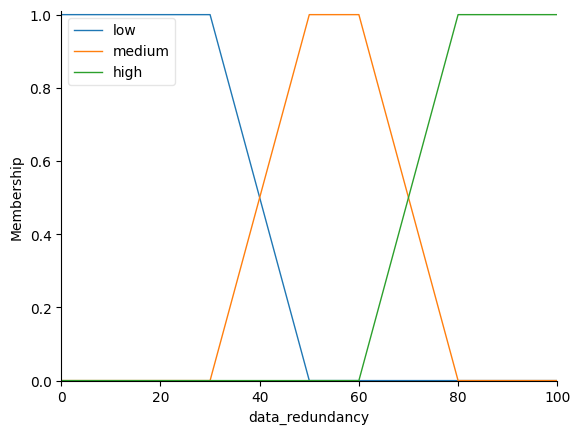

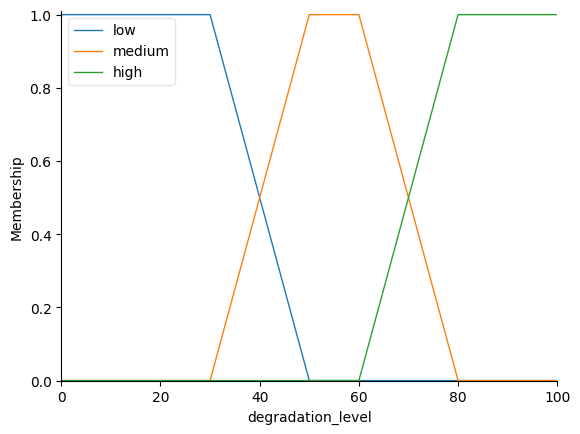

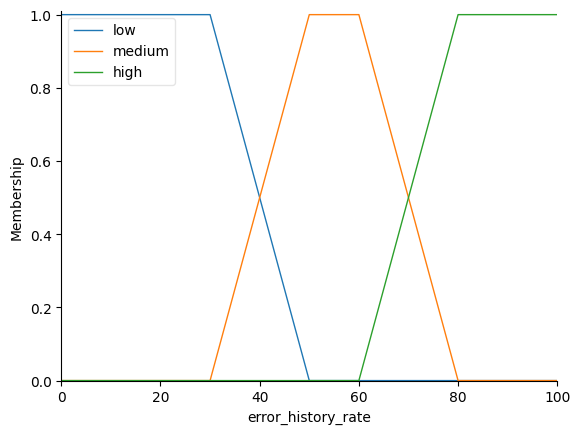

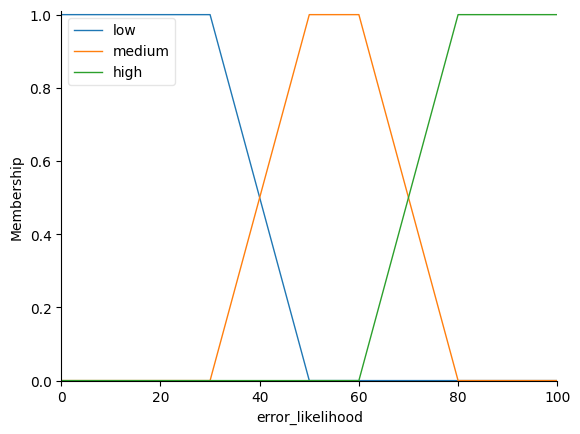

In [10]:
# define antecedents and consequent
data_redundancy = ctrl.Antecedent(np.arange(0, 101, 1), 'data_redundancy')
degradation_level = ctrl.Antecedent(np.arange(0, 101, 1), 'degradation_level')
error_history_rate = ctrl.Antecedent(np.arange(0, 101, 1), 'error_history_rate')
error_likelihood = ctrl.Consequent(np.arange(0, 101, 1), 'error_likelihood')

# define membership function ranges using trapisiam
data_redundancy['low'] = fuzz.trapmf(data_redundancy.universe, [0, 0, 30, 50])
data_redundancy['medium'] = fuzz.trapmf(data_redundancy.universe, [30, 50, 60, 80])
data_redundancy['high'] = fuzz.trapmf(data_redundancy.universe, [60, 80, 100, 100])

degradation_level['low'] = fuzz.trapmf(degradation_level.universe, [0, 0, 30, 50])
degradation_level['medium'] = fuzz.trapmf(degradation_level.universe, [30, 50, 60, 80])
degradation_level['high'] = fuzz.trapmf(degradation_level.universe, [60, 80, 100, 100])

error_history_rate['low'] = fuzz.trapmf(error_history_rate.universe, [0, 0, 30, 50])
error_history_rate['medium'] = fuzz.trapmf(error_history_rate.universe, [30, 50, 60, 80])
error_history_rate['high'] = fuzz.trapmf(error_history_rate.universe, [60, 80, 100, 100])

error_likelihood['low'] = fuzz.trapmf(error_likelihood.universe, [0, 0, 30, 50])
error_likelihood['medium'] = fuzz.trapmf(error_likelihood.universe, [30, 50, 60, 80])
error_likelihood['high'] = fuzz.trapmf(error_likelihood.universe, [60, 80, 100, 100])


# view membership functions
data_redundancy.view()
degradation_level.view()
error_history_rate.view()
error_likelihood.view()

In [11]:
# define rules
rule1 = ctrl.Rule(data_redundancy['low'] & degradation_level['low'] & error_history_rate['low'], error_likelihood['medium'])
rule2 = ctrl.Rule(data_redundancy['low'] & degradation_level['low'] & error_history_rate['medium'], error_likelihood['medium'])
rule3 = ctrl.Rule(data_redundancy['low'] & degradation_level['low'] & error_history_rate['high'], error_likelihood['high'])

rule4 = ctrl.Rule(data_redundancy['low'] & degradation_level['medium'] & error_history_rate['low'], error_likelihood['low'])
rule5 = ctrl.Rule(data_redundancy['low'] & degradation_level['medium'] & error_history_rate['medium'], error_likelihood['medium'])
rule6 = ctrl.Rule(data_redundancy['low'] & degradation_level['medium'] & error_history_rate['high'], error_likelihood['medium'])

rule7 = ctrl.Rule(data_redundancy['low'] & degradation_level['high'] & error_history_rate['low'], error_likelihood['medium'])
rule8 = ctrl.Rule(data_redundancy['low'] & degradation_level['high'] & error_history_rate['medium'], error_likelihood['high'])
rule9 = ctrl.Rule(data_redundancy['low'] & degradation_level['high'] & error_history_rate['high'], error_likelihood['high'])


rule10 = ctrl.Rule(data_redundancy['medium'] & degradation_level['low'] & error_history_rate['low'], error_likelihood['low'])
rule11 = ctrl.Rule(data_redundancy['medium'] & degradation_level['low'] & error_history_rate['medium'], error_likelihood['medium'])
rule12 = ctrl.Rule(data_redundancy['medium'] & degradation_level['low'] & error_history_rate['high'], error_likelihood['medium'])

rule13 = ctrl.Rule(data_redundancy['medium'] & degradation_level['medium'] & error_history_rate['low'], error_likelihood['medium'])
rule14 = ctrl.Rule(data_redundancy['medium'] & degradation_level['medium'] & error_history_rate['medium'], error_likelihood['medium'])
rule15 = ctrl.Rule(data_redundancy['medium'] & degradation_level['medium'] & error_history_rate['high'], error_likelihood['medium'])

rule16 = ctrl.Rule(data_redundancy['medium'] & degradation_level['high'] & error_history_rate['low'], error_likelihood['medium'])
rule17 = ctrl.Rule(data_redundancy['medium'] & degradation_level['high'] & error_history_rate['medium'], error_likelihood['medium'])
rule18 = ctrl.Rule(data_redundancy['medium'] & degradation_level['high'] & error_history_rate['high'], error_likelihood['high'])

rule19 = ctrl.Rule(data_redundancy['high'] & degradation_level['low'] & error_history_rate['low'], error_likelihood['low'])
rule20 = ctrl.Rule(data_redundancy['high'] & degradation_level['low'] & error_history_rate['medium'], error_likelihood['low'])
rule21 = ctrl.Rule(data_redundancy['high'] & degradation_level['low'] & error_history_rate['high'], error_likelihood['medium'])

rule22 = ctrl.Rule(data_redundancy['high'] & degradation_level['medium'] & error_history_rate['low'], error_likelihood['low'])
rule23 = ctrl.Rule(data_redundancy['high'] & degradation_level['medium'] & error_history_rate['medium'], error_likelihood['medium'])
rule24 = ctrl.Rule(data_redundancy['high'] & degradation_level['medium'] & error_history_rate['high'], error_likelihood['medium'])

rule25 = ctrl.Rule(data_redundancy['high'] & degradation_level['high'] & error_history_rate['low'], error_likelihood['medium'])
rule26 = ctrl.Rule(data_redundancy['high'] & degradation_level['high'] & error_history_rate['medium'], error_likelihood['medium'])
rule27 = ctrl.Rule(data_redundancy['high'] & degradation_level['high'] & error_history_rate['high'], error_likelihood['high'])

In [12]:
# create the control system
error_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, 
    rule19, rule20,rule21, rule22, rule23, rule24, rule25, rule26, rule27])

In [13]:
# create a simulation with the control system
error = ctrl.ControlSystemSimulation(error_ctrl)

In [14]:
# compute sample input
error.input['data_redundancy'] = 100
error.input['degradation_level'] = 60
error.input['error_history_rate'] = 10

error.compute()

20.41666666666666


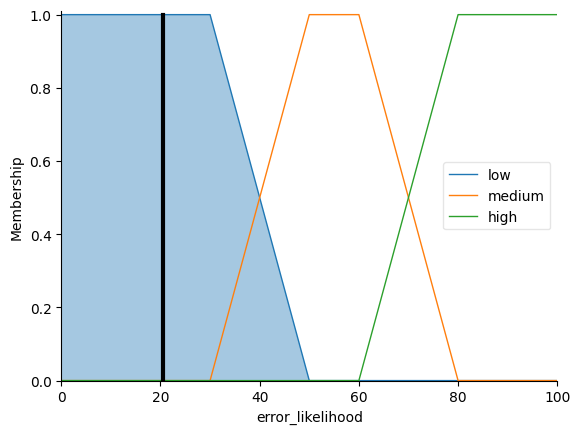

In [15]:
print(error.output['error_likelihood'])
error_likelihood.view(sim=error)